# ohlcv test

In [26]:
%matplotlib inline

import env
import lib
env.run_mode = env.MODE_UNITTEST
from data_getter.mssql import MSSQLGetter
from data_getter.oanda import OandaGetter
from data_getter.pandas_getter import PandasGetter

import matplotlib.pyplot as plt
from matplotlib import ticker 
import numpy as np
import pandas as pd
import mpl_finance
from matplotlib.dates import date2num
import matplotlib.dates as mdates


In [27]:
og = PandasGetter(MSSQLGetter(OandaGetter("USD_JPY", "H1")))
    
st = lib.str2epoch("2019/04/02 07:00", "%Y/%m/%d %H:%M")
ed = lib.str2epoch("2019/04/02 12:00", "%Y/%m/%d %H:%M")
og.retrievePrice(st, ed)
df = og.getPrice(st, ed)
df

,o,h,l,c,v
2019-04-02 07:00:00+00:00,111.373,111.421,111.357,111.370,448.0
2019-04-02 08:00:00+00:00,111.372,111.396,111.344,111.391,301.0
2019-04-02 09:00:00+00:00,111.394,111.402,111.310,111.359,372.0
2019-04-02 10:00:00+00:00,111.356,111.381,111.322,111.356,362.0
2019-04-02 11:00:00+00:00,111.354,111.386,111.294,111.366,470.0


c:\users\kot\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737151.0, right=737151.0
  import sys


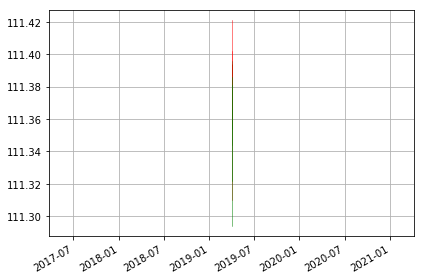

In [30]:
fig, ax = plt.subplots()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(6))
#xdate = [x.date() for x in df.index]
ohlc = np.vstack((date2num(df.index), df.values.T)).T
mpl_finance.candlestick_ohlc(ax, ohlc, width=0.7, colorup='g', colordown='r')
ax.grid()
ax.set_xlim(df.index[0].date(), df.index[-1].date())
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d %H:%M')
fig.autofmt_xdate()
fig.tight_layout()